### Level 1 Task Solution


**Project Goal:** Create a website with an integrated payment system.


To successfully complete the tasks, we need to achieve the following results:

0. Project kickoff.
1. Website design prepared.
2. Database designed.
3. Website design implemented.
4. Dynamic interface elements programmed.
5. Text content prepared.
6. Endpoints programmed.
7. Frontend and backend integrated.
8. Documents prepared.
9. User testing conducted.
10. Documents hosted on the website.
11. Payment system validation completed.
12. Payment system integrated.
13. Special animation added.


### Project table

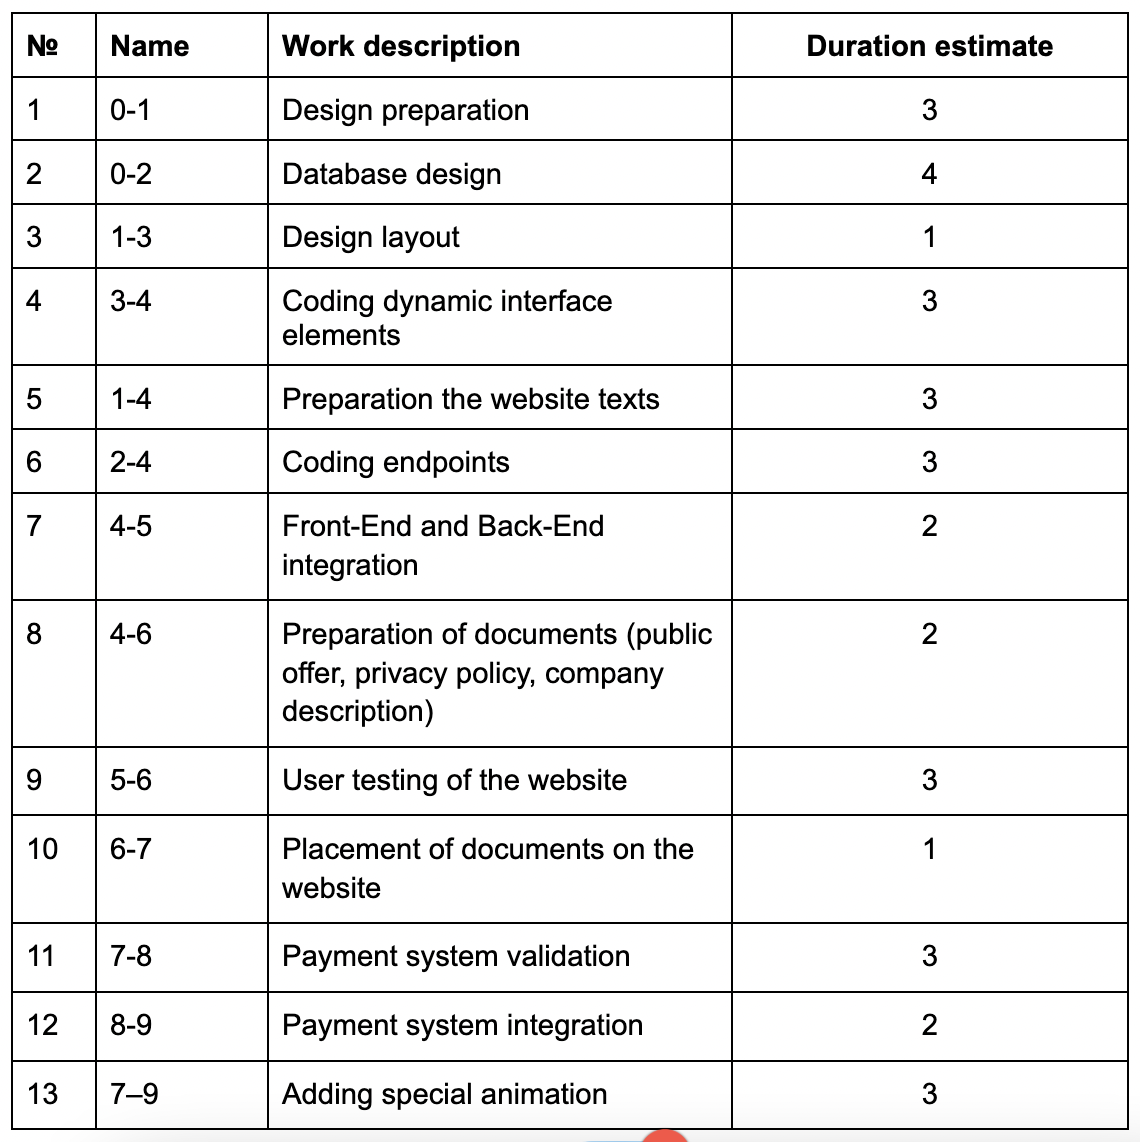

[Project table](https://docs.google.com/document/d/1ppZGN8--u4rHCqlsW-l9M3kLGZxCNVaHYG3lgmI4d04/edit?usp=sharing)

### Graph diagram

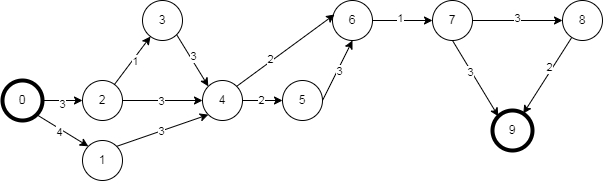



[Graph diagram](https://drive.google.com/file/d/1TjnzNzd6KZGX2LbD3DfJNlkmF9bkAdOP/view?usp=sharing)

### Adjacency matrix

$A=\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 3 & 4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 3 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 2 & 2 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 3\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{pmatrix}$.

### Program code

In [ ]:
# !/usr/bin/python3
from tkinter import *
root = Tk()

c = Canvas(root, width=650, height=300, bg='white') # Canvas size and color
c.pack()

# Adjacency matrix
m_sm = [
    [0,4,3,0,0,0,0,0,0,0],
    [0,0,0,0,3,0,0,0,0,0],
    [0,0,0,1,3,0,0,0,0,0],
    [0,0,0,0,3,0,0,0,0,0],
    [0,0,0,0,0,2,2,0,0,0],
    [0,0,0,0,0,0,3,0,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,3,3],
    [0,0,0,0,0,0,0,0,0,2],
    [0,0,0,0,0,0,0,0,0,0],
]


# Determining the coordinates of the vertices on the canvas
tops = [
    {'x':20,'y':150,'n':'0','tmax':0,'tmin':0},
    {'x':100,'y':210,'n':'1','tmax':0,'tmin':0},
    {'x':100,'y':150,'n':'2','tmax':0,'tmin':0},
    {'x':160,'y':70,'n':'3','tmax':0,'tmin':0},
    {'x':220,'y':150,'n':'4','tmax':0,'tmin':0},
    {'x':300,'y':150,'n':'5','tmax':0,'tmin':0},
    {'x':350,'y':70,'n':'6','tmax':0,'tmin':0},
    {'x':450,'y':70,'n':'7','tmax':0,'tmin':0},
    {'x':580,'y':70,'n':'8','tmax':0,'tmin':0},
    {'x':510,'y':180,'n':'9','tmax':0,'tmin':0},
]



# Vertex drawing function
def top_pert(x,y,min,max,i):
    c.create_oval(x-20,y-20,x+20,y+20)
    c.create_text(x, y+5, text=f"{max}/{min}",  font="Arial 10")
    c.create_text(x, y-10, text=f"[{i}]",  font="Arial 8")


# Edge drawing function
def edge_kn(n1,n2,k,n):
    global tops, m_sm
    x1 = tops[n1]['x']
    y1 = tops[n1]['y']

    x2 = tops[n2]['x']
    y2 = tops[n2]['y']

    if x1>x2:
        x_1 = x1-10
        x_2 = x2 + 10

    elif x1<x2:
        x_1 = x1+10
        x_2 = x2 - 10

    elif x1==x2:
        x_1 = x1
        x_2 = x2

    if y1 > y2:
        y_1 = y1 -20
        y_2 = y2 +20
    elif y1 < y2:
        y_1 = y1 +20
        y_2 = y2 -20
    elif y1 == y2:
        y_1 = y1
        y_2 = y2

    # If the maximum and minimum execution times do not match (there is a reserve), draw a green arrow; if they match (the edge belongs to the critical path), draw a red arrow.
    if tops[n2]['tmax'] - (tops[n1]['tmax']+m_sm[n1][n2]) >0:
        print (f"n1={n1},n2 = {n2}")
        c.create_line(x_1, y_1,x_2, y_2, fill='green',
                width=5, arrow=LAST,
                activefill='lightgreen',
                arrowshape="10 20 10")
    else:
        c.create_line(x_1, y_1,x_2, y_2, fill='red',
                width=5, arrow=LAST,
                activefill='lightgreen',
                arrowshape="10 20 10")

    # Print the weight of the edge
    x_t = x_1+int((x_2-x_1)/2)
    y_t = y_1+int((y_2-y_1)/2)+10
    c.create_text(x_t, y_t-20, text=n,  font="Arial 12")



# Determining the maximum and minimum end time of the work
q = []
n_max = [0,0,0,0,0,0,0,0,0,0]
n_min = [0,0,0,0,0,0,0,0,0,0]
q.append(0)
while len(q)>0:
    v = q.pop(0)

    for i in range(len(m_sm[v])):
        if m_sm[v][i]>0:
            q.append(i)
            n_max[i] = n_max[v] + m_sm[v][i]
            if  n_min[i]==0 or (n_min[i]> n_min[v] + m_sm[v][i]):
                n_min[i] = n_min[v] + m_sm[v][i]

# Edge output cycle
for i in range(len(tops)):
    tops[i]['tmin'] = n_min[i]
    tops[i]['tmax'] = n_max[i]
    top_pert(tops[i]['x'],tops[i]['y'],tops[i]['tmin'],tops[i]['tmax'],i)

# Vertex output cycle
for i in range(len(m_sm)):
  for j in range(len(m_sm[i])):
     if m_sm[i][j] != 0:
         edge_kn(i,j,'a',m_sm[i][j])

root.mainloop()

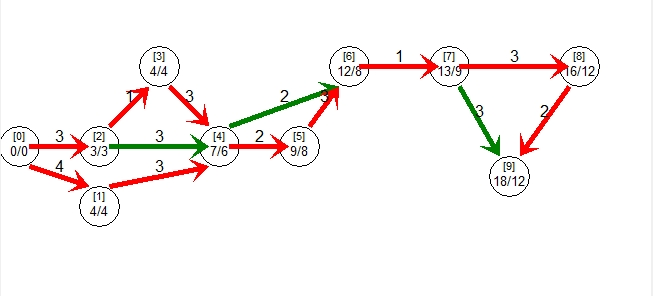